In [18]:
#Import 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import os
import warnings

In [19]:
df = pd.read_csv("data_cleaned.csv",sep=",")

In [3]:
df.head()

,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79.0,17.0,100
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130.0,29.0,164
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66.0,14.0,80
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572.0,147.0,1777
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325.0,49.0,393


We are taking a look to make sure our data is formatted properly. 

In [5]:
df.describe()

,Page total likes,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,share,Total Interactions
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,4.950000e+02,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,123173.268687,1.886869,7.028283,4.133333,7.844444,0.280808,14028.101010,2.985698e+04,926.830303,804.155556,1425.921212,1.691628e+04,6641.355556,614.135354,7.557576,179.145455,27.264646,213.967677
std,16203.818031,0.853268,3.304274,2.030735,4.385064,0.449849,22821.050008,7.714291e+04,987.713267,885.184440,2007.663460,6.007402e+04,7700.266455,614.346297,21.274384,324.412161,42.656388,381.677449
min,81370.000000,1.000000,1.000000,1.000000,1.000000,0.000000,238.000000,5.700000e+02,9.000000,9.000000,9.000000,5.670000e+02,236.000000,9.000000,0.000000,0.000000,0.000000,0.000000
25%,112324.000000,1.000000,4.000000,2.000000,3.000000,0.000000,3331.000000,5.798000e+03,399.000000,335.000000,512.500000,4.073500e+03,2213.000000,297.500000,1.000000,57.000000,10.000000,72.000000
50%,129600.000000,2.000000,7.000000,4.000000,9.000000,0.000000,5290.000000,9.084000e+03,630.000000,555.000000,861.000000,6.282000e+03,3478.000000,416.000000,3.000000,101.000000,19.000000,125.000000
75%,136393.000000,3.000000,10.000000,6.000000,11.000000,1.000000,13248.000000,2.250300e+04,1062.000000,969.000000,1479.000000,1.514300e+04,8018.000000,658.500000,7.000000,188.000000,32.500000,231.000000
max,139441.000000,3.000000,12.000000,7.000000,23.000000,1.000000,180480.000000,1.110282e+06,11452.000000,11328.000000,19779.000000,1.107833e+06,51456.000000,4376.000000,372.000000,5172.000000,790.000000,6334.000000


We look at the sum of missing information and what % of the data takes up the total


In [22]:
missing.columns = ['count', '%']
missing = missing.sort_values(by = 'count', ascending = False)

missing

,count,%
Page total likes,0,0.0
Lifetime Post Consumers,0,0.0
share,0,0.0
like,0,0.0
comment,0,0.0
Lifetime People who have liked your Page and engaged with your post,0,0.0
Lifetime Post reach by people who like your Page,0,0.0
Lifetime Post Impressions by people who have liked your Page,0,0.0
Lifetime Post Consumptions,0,0.0
Lifetime Engaged Users,0,0.0


In [23]:
df.value_counts(dropna=False)


Page total likes  Type    Category  Post Month  Post Weekday  Post Hour  Paid  Lifetime Post Total Reach  Lifetime Post Total Impressions  Lifetime Engaged Users  Lifetime Post Consumers  Lifetime Post Consumptions  Lifetime Post Impressions by people who have liked your Page  Lifetime Post reach by people who like your Page  Lifetime People who have liked your Page and engaged with your post  comment  like   share  Total Interactions
81370             Photo   1         1           5             2          0.0   3778                       7216                             625                     572                      795                         4742                                                          2388                                              363                                                                  4        93.0   18.0   115                   1
135700            Photo   2         9           2             11         0.0   3756                       7094       

Here we calculate the sum and percentage of missing values in each column of your DataFrame. We checked to see if there are missing values and there is none.

In [9]:
#Collecting the names of each column in the dataframe
df_columns = list(df.columns)

In [10]:
#Calculating the amount of times 'Missing' shows up in each column
missing3 = [sum(df[column] == 'Missing') for column in df]

In [11]:
missing3

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [14]:
# Create a DataFrame with column names and their respective missing counts
df_missing = pd.DataFrame({'Column Name': missing_counts.index, 'Missing Count': missing_counts.values})

We Set the 'Column Name' as the index if needed. df_missing.set_index('Column Name', inplace=True)

In [17]:
print(df_missing)


                                          Column Name  Missing Count
0                                    Page total likes              0
1                                                Type              0
2                                            Category              0
3                                          Post Month              0
4                                        Post Weekday              0
5                                           Post Hour              0
6                                                Paid              0
7                           Lifetime Post Total Reach              0
8                     Lifetime Post Total Impressions              0
9                              Lifetime Engaged Users              0
10                            Lifetime Post Consumers              0
11                         Lifetime Post Consumptions              0
12  Lifetime Post Impressions by people who have l...              0
13   Lifetime Post reach by people

I checked to see if there are missing values and  all "Missing Count" values are zero. There is an indication that there are no missing values in any of the columns.

In [24]:
del df["Type"]

Here I chose to delete the type column which included strings so I can sucessfully create a heat map that allows me to futher visualize my data

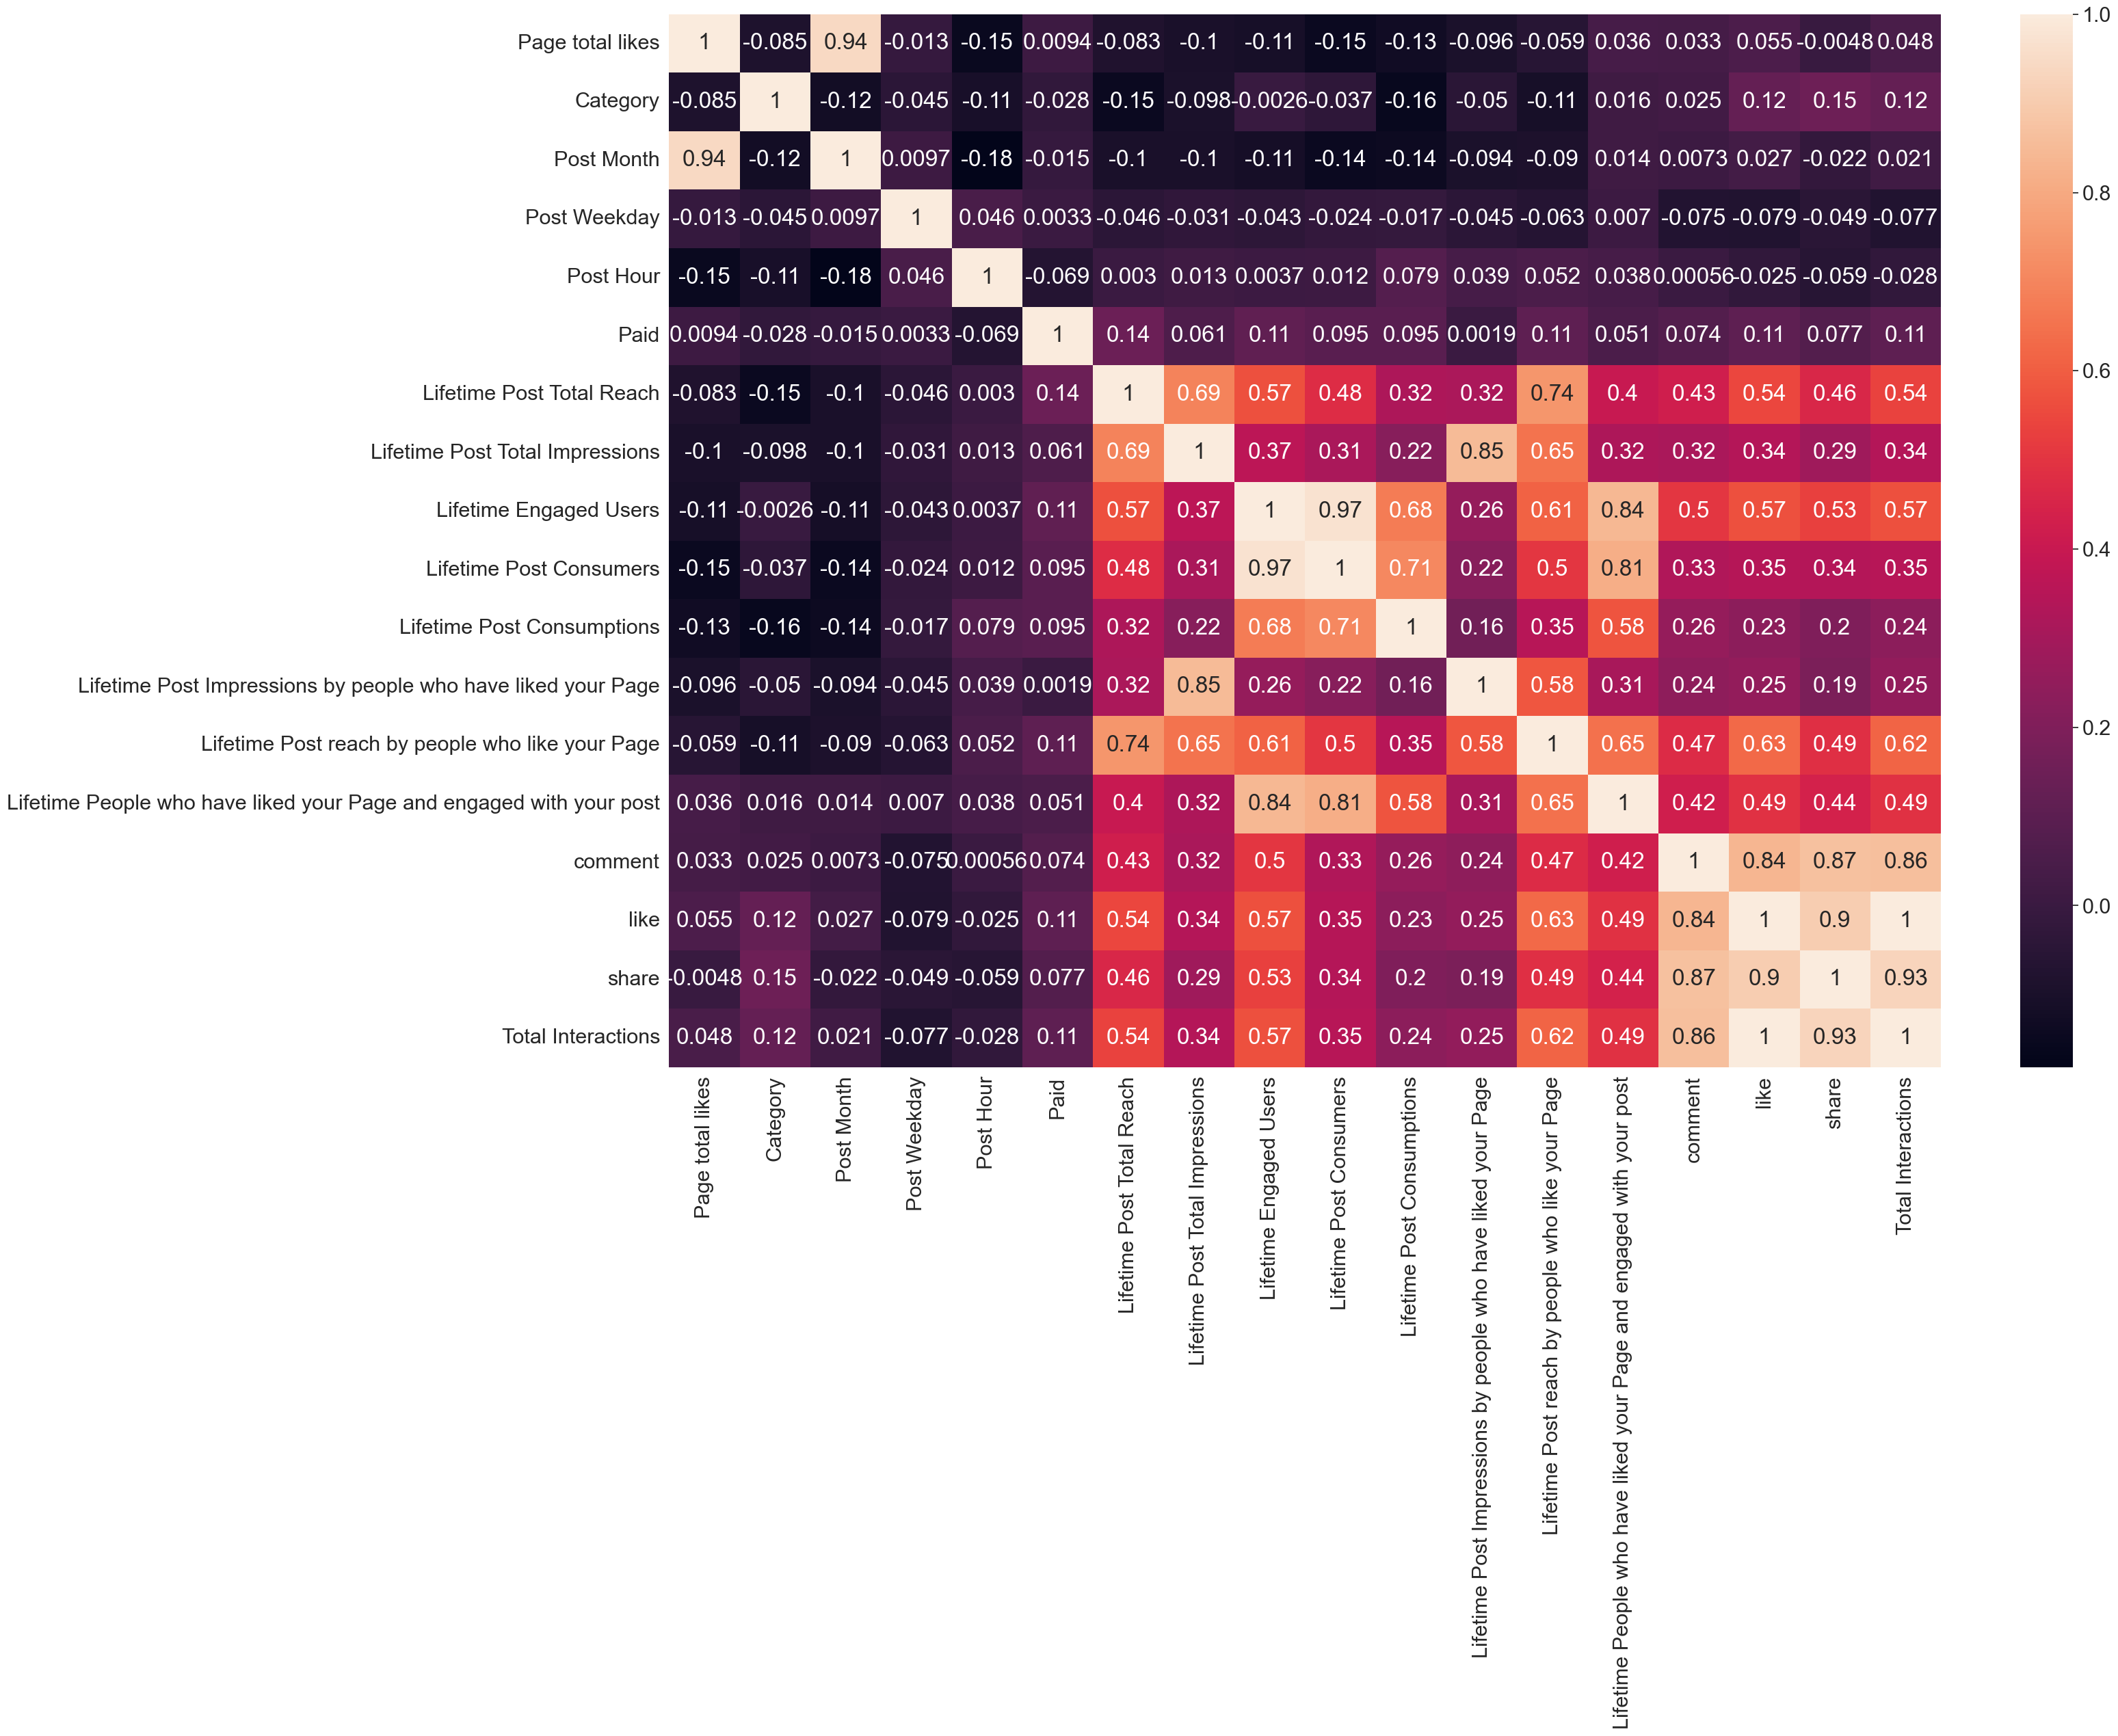

In [25]:
#Utilize heatmaps as another way of visualizing
plt.figure(figsize = (30,20))
sns.set(font_scale = 2)
sns.heatmap(df.corr(), annot=True);

Heat maps are graphical representations of data where values in a matrix are represented as colors. They provide a visual way to understand complex relationships and patterns within a dataset.